## Overview

The key to this project is to categorize confidence level of a writing sample and then use that information to compare the confidence in writing of men to women. 

Hypothesis: women and men writing samples have a differing level of confidence

Your work should document findings for peers and technical stakeholders, including:

-Executive Summary

-Identification of outliers

-Description of how you defined your variables

-Discussion of model selection and implementation

-Description of any data pipeline(s)

-Visualizations & statistical analysis

-Interpretation of findings & relation to goals/success metrics

-Description of any source code used to conduct analysis

-Stakeholder recommendations & next steps for model/peers

##  Import Relevant Packages

In [63]:
import pandas as pd
import requests 
import json
import html5lib

# Step 1: Request data from URL
# Step 2: use json to return data in dictionary structure


In [64]:
from bs4 import BeautifulSoup
import lxml.html as LH

In [65]:
import seaborn as sns

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
import pickle

In [68]:
%matplotlib inline

In [116]:
import nltk
from nltk.corpus import brown

from cPickle import dump, load
import sys
import os
from itertools import dropwhile

In [203]:
import sexmachine.detector as gender

In [212]:
import gender_guesser.detector as gender

In [331]:
import matplotlib.pyplot as plt


In [369]:
#requires a lot of package downloads (can use as a backup for 'sexmachine')
#from genderizer.genderizer import Genderizer

## Import Data

Previously done and pickled 

### Initially tried other ways to import

In [ ]:
# myfile = open('/Users/samanthafalk/GA-DSI/projects-capstone/sorted_data/apparel/all.review', 'r')
# data=myfile.read().replace('\n', '')
# table = LH.fromstring(data)
# dataf = [[uid.text_content() for uid in review.xpath('unique_id')]
#           for review in table.xpath('review')]
# df = pd.DataFrame(dataf)

### Utilized the following code to import data

In [3]:
# def read_file(filename):
#     myfile = open('/Users/samanthafalk/GA-DSI/projects-capstone/sorted_data/'+ filename +'/all.review', 'r')
#     data=myfile.read().replace('\n', '')
#     table = LH.fromstring(data)
    
#     datadf = [[[uid.text_content() for uid in review.xpath('unique_id')][0], 
               
#            [name.text_content() for name in review.xpath('reviewer')][0],
               
#            [location.text_content() for location in review.xpath('reviewer_location')][0],
               
#            [date.text_content() for date in review.xpath('date')][0],
               
#            [product.text_content() for product in review.xpath('product_name')][0],
               
#            [helpful.text_content() for helpful in review.xpath('helpful')][0],
               
#            [title.text_content() for title in review.xpath('title')][0],
               
#            [reviewtext.text_content() for reviewtext in review.xpath('review_text')][0]]
              
#            for review in table.xpath('review')]
    
#     df = pd.DataFrame(datadf, columns=['unique_id', 'reviewer','reviewer_location', 'date', 'product_name', 'helpful', 'title', 'review_text'  ])
#     return df

In [ ]:
#TESTING FUNCTION
# appareldf=read_file('apparel')
# appareldf['type']='apparel'
# appareldf

## Utilizes function above to iterate through files and add to master dataframe

In [4]:
def combinedataframes(lstoffiles):
    for i in range(len(lstoffiles)):
        print lstoffiles[i]
        if i==0:
            dfmaster=read_file(lstoffiles[i])
            dfmaster['type']=lstoffiles[i]
        else:
            df=read_file(lstoffiles[i])
            df['type']=lstoffiles[i]
            dfmaster= pd.concat([dfmaster, df])

    dfmaster.reset_index(inplace=True, drop=True)
    return dfmaster

In [11]:
#list of files
filenamelst=['apparel', 'automotive', 'baby', 'beauty','camera_&_photo', 
             'cell_phones_&_service', 'computer_&_video_games', 'kitchen_&_housewares', 'sports_&_outdoors', 'magazines',
             'electronics', 'music', 'gourmet_food', 'musical_instruments', 'tools_&_hardware', 'grocery',
             'office_products', 'toys_&_games', 'health_&_personal_care', 'outdoor_living',
             'jewelry_&_watches', 'software']

other= ['DVD', 'video']

#removed books (almost 1 million), DVD, and videos

In [6]:
#create master dataframe
masterdf=combinedataframes(filenamelst)

apparel
automotive
baby
beauty
camera_&_photo
cell_phones_&_service
computer_&_video_games
kitchen_&_housewares
sports_&_outdoors
magazines
electronics
music
gourmet_food
musical_instruments
tools_&_hardware
grocery
office_products
toys_&_games
health_&_personal_care
outdoor_living
jewelry_&_watches
software


In [12]:
#add in video reviews
videoreviews=combinedataframes(other)

DVD
video


In [14]:
#add two dataframes together
masterdf= pd.concat([masterdf, videoreviews])
masterdf.reset_index(inplace=True, drop=True)

In [13]:
#pickle df
masterdf.to_pickle('dataframePickle')

In [6]:
#read in pickle
masterdf = pd.read_pickle('dataframePickle')

In [7]:
masterdf.tail()

unique_id  \
447331  6300269450:best_surf_movie:david_adams_"i_left...   
447332                                    6300269450:yes:   
447333  B000IAUJYE:my_favorite_episode:j._donaldson_"c...   
447334    B000IAUJYE:great_episode:alena_kinser_"leeners"   
447335      B000IAUJYE:not_happy:katie_j._johnson_"katie"   

                                    reviewer      reviewer_location  \
447331  David Adams "I left my wallet in..."         ...Detroit, MI   
447332                                                                
447333              J. Donaldson "Cal-diver"  Thousand Oaks, CA USA   
447334                Alena Kinser "Leeners"         Des Moines, WA   
447335              Katie J. Johnson "Katie"  Townsville, Australia   

                      date                                       product_name  \
447331    January 13, 2005  Big Wednesday: Video: Jan-Michael Vincent,Gary...   
447332       June 14, 2004  Big Wednesday: Video: Jan-Michael Vincent,Gary...   
447333      March 19, 2007  Conspiracy Theory: Unbox Video: Mark Harmon,Sa...   
447334    December 3, 2006  Conspiracy Theory: Unbox Video: Mark Harmon,Sa...   
447335  September 28, 2006  Conspiracy Theory: Unbox Video: Mark Harmon,Sa...   

       helpful                title  \
447331  5 of 5      Best Surf Movie   
447332  3 of 3                  Yes   
447333  1 of 1  My Favorite Episode   
447334  1 of 3        Great Episode   
447335  3 of 7            Not Happy   

                                              review_text   type  
447331  I'm sure I'll get some flack for declaring thi...  video  
447332  If you're interested in surfing at all, you ne...  video  
447333  I don't have television, haven't for 11 years....  video  
447334  This is the first episode where we really see ...  video  
447335  I'm a fan of NCIS, but living in australia mea...  video

In [9]:
masterdf['type'].value_counts()

music                     174180
DVD                       124438
video                      36180
electronics                23009
kitchen_&_housewares       19856
toys_&_games               13147
apparel                     9252
camera_&_photo              7408
health_&_personal_care      7225
sports_&_outdoors           5728
baby                        4256
magazines                   4191
beauty                      2884
computer_&_video_games      2771
grocery                     2632
software                    2390
jewelry_&_watches           1981
outdoor_living              1599
gourmet_food                1575
cell_phones_&_service       1023
automotive                   736
office_products              431
musical_instruments          332
tools_&_hardware             112
Name: type, dtype: int64

In [10]:
#add word count
masterdf['word_count']=[len(x.split(' ')) for x in masterdf['review_text']]

In [32]:
#find middle 50 percent
masterdf['word_count'].describe(percentiles=[.35, .5, .85])

count    447336.000000
mean        138.420547
std         157.359194
min           1.000000
35%          61.000000
50%          88.000000
85%         241.000000
max        4516.000000
Name: word_count, dtype: float64

In [12]:
#look at details of dataframe
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447336 entries, 0 to 447335
Data columns (total 10 columns):
unique_id            447336 non-null object
reviewer             447336 non-null object
reviewer_location    447336 non-null object
date                 447336 non-null object
product_name         447336 non-null object
helpful              447336 non-null object
title                447336 non-null object
review_text          447336 non-null object
type                 447336 non-null object
word_count           447336 non-null int64
dtypes: int64(1), object(9)
memory usage: 34.1+ MB


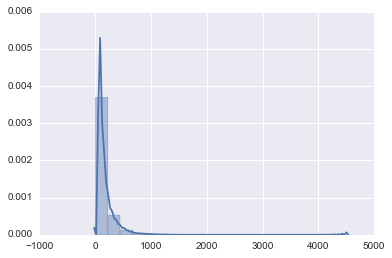

In [17]:
#look at ditribution of word count
#remove outliers and also reviews that have too small of paragraphs
sns.distplot(masterdf[['word_count']], bins=20)

In [33]:
mid50df=masterdf.loc[masterdf['word_count']>=61]

In [34]:
mid50df=mid50df.loc[mid50df['word_count']<=241]

In [35]:
mid50df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226060 entries, 0 to 447333
Data columns (total 10 columns):
unique_id            226060 non-null object
reviewer             226060 non-null object
reviewer_location    226060 non-null object
date                 226060 non-null object
product_name         226060 non-null object
helpful              226060 non-null object
title                226060 non-null object
review_text          226060 non-null object
type                 226060 non-null object
word_count           226060 non-null int64
dtypes: int64(1), object(9)
memory usage: 19.0+ MB


In [36]:
#sort by word count
mid50df.sort(columns='word_count', inplace=True)

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [37]:
# reset index
mid50df.reset_index(drop=True, inplace=True)

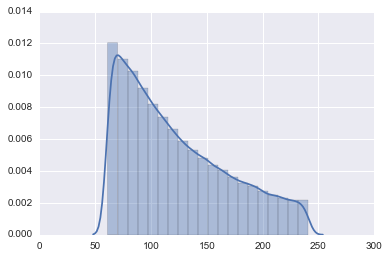

In [38]:
#visualize distribution again
sns.distplot(mid50df[['word_count']], bins=20)

In [63]:
mid50df.head()

unique_id            reviewer  \
0                     B00004YRQ9:ps2_controller:jack                Jack   
1                         B00004U9PO:soft-core_fun!:                       
2  B000H7JDVI:have_a_listen_to_elton_john's_the_c...           B. Schram   
3       B000001AH0:timeless_teena:k._blunt_"kblunt1"  K. Blunt "kblunt1"   
4  B00000EFZK:discover_what_the_radio_program_man...            R. Hogan   

      reviewer_location               date  \
0                           April 22, 2006   
1                        December 30, 2000   
2               Mpls,Mn  November 15, 2006   
3  LA, CA United States       May 17, 2005   
4                         January 30, 2006   

                                        product_name   helpful  \
0  Sony Playstation 2 Black Dualshock Controller:...    2 of 2   
1  Ultimate Attraction (Rated): Video: Gabriella ...  24 of 31   
2         The Captain and the Kid: Music: Elton John             
3              Irons in the Fire: Music: Teena Marie    2 of 2   
4                   The Chess Box: Music: Bo Diddley    1 of 2   

                                               title  \
0                                     PS2 controller   
1                                     Soft-Core fun!   
2  Have a listen to Elton John's The Captain and ...   
3                                     Timeless Teena   
4  Discover what the radio program manager kept f...   

                                         review_text                    type  \
0  Ok, I've had this controller for 3 years and n...  computer_&_video_games   
1  The plot behind this film is silly, Gabriella ...                   video   
2  Being a fan of the great EJ and fully enjoying...                   music   
3  This has to be my favorite Teena Marie album. ...                   music   
4  I listened to both CD's twice in one weekend. ...                   music   

   word_count  
0          61  
1          61  
2          61  
3          61  
4          61

In [51]:
#pickle middle 50 percent dataframe
mid50df.to_pickle('mid50percentdata')

In [117]:
#check that the wordcount is accurate
print mid50df['word_count'][7]
print mid50df['review_text'][7]

61
I thought this was actually pretty good. The chocolate pieces added just enough chocolate taste to enjoy. I did not have any issues with 'waxy' taste. This is not baking choclate that melts in your hand so don't expect it to be. It has to hold up in the milk as well as on the shelf. I will definitely purchase again.


In [118]:
mid50df.sort(columns='word_count').tail()

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


unique_id  \
225772            B0006FYORY:vibrant_&_exotic:moongoddess   
225771  B000HC2LEY:outstanding_and_unforgettable_film!...   
225770  B000E97H8K:the_lady_can_sing.:music_judge_"tho...   
225768  B00006FIAX:a_lesson_in_how_experimentation_can...   
226059  B0000CFXNS:a_masterpiece_enhanced:joburgpete_"...   

                     reviewer               reviewer_location  \
225772            MoonGoddess                 Ontario, CA USA   
225771          Ernest Jagger         Culver City, California   
225770   Music Judge "Thomas"                        Illinois   
225768              Metalhead  Indianapolis, IN United States   
226059  Joburgpete "irridium"                    Johannesburg   

                    date                                       product_name  \
225772   August 24, 2005                           Illuminate: Music: Qntal   
225771  October 18, 2006  Reservoir Dogs (15th Anniversary Edition): DVD...   
225770   August 13, 2006  A Little Girl... A Big Four-Lane: Music: Aleci...   
225768   August 18, 2005              Damage Done: Music: Dark Tranquillity   
226059   January 8, 2006                         Revenge: Music: Eurythmics   

         helpful                                     title  \
225772  11 of 16                          Vibrant & Exotic   
225771    8 of 8       Outstanding And Unforgettable Film!   
225770    7 of 7                        The Lady Can Sing.   
225768    4 of 4  A lesson in how experimentation can work   
226059    8 of 9                    A masterpiece enhanced   

                                              review_text   type  word_count  
225772  Qntal, unfamiliar to me at the time, started s...  music         241  
225771  I liked this film when I first viewed it, [it ...    DVD         241  
225770  I had never heard of Alecia Nugent until I cam...  music         241  
225768  There have been a lot of metal bands recently ...  music         241  
226059  After great synth albums like Sweet Dreams and...  music         241

## Random sample for mechanical turk exercise 

In [147]:
mid50dfsample= mid50df.sample(frac=.0055, random_state=666)

In [148]:
mid50dfsample.reset_index(inplace=True, drop=True)

In [149]:
mid50dfsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 10 columns):
unique_id            1243 non-null object
reviewer             1243 non-null object
reviewer_location    1243 non-null object
date                 1243 non-null object
product_name         1243 non-null object
helpful              1243 non-null object
title                1243 non-null object
review_text          1243 non-null object
type                 1243 non-null object
word_count           1243 non-null int64
dtypes: int64(1), object(9)
memory usage: 97.2+ KB


In [154]:
train, test = train_test_split(mid50df, test_size = 0.0055)

In [183]:
mechturkreviews=test[['review_text']]

In [184]:
mechturkreviews.reset_index(inplace=True, drop=True)

In [198]:
test= mechturkreviews['review_text'][4]

In [199]:
test

'This album is a winner. She`s great looking that`s for sure, but when listen trough  when youre heart are in pain, and youre soul are swinging from up and downs, this album gives you medicine.  With Jerry Douglas on Dobro, how can you miss the focus on great music. The voice, mmmm the voice, has a certain signature to it . It could be sometimes to softspoken to lift it up to a 5 star. But you certainly will put it many times on your record player, and you can cancell your therapist, that day. To say it with Allison Kraus: (Track 11):Dreaming My Dreams with you: It makes you to a walking lullabay the rest of the day. It`s an earbalsam song that will knock you over'

In [170]:
#mechturkreviews['review_text']= [x.replace('`', "'") for x in mechturkreviews['review_text']]

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [187]:
mechturkreviews['review_text']= [x.encode('utf-8') for x in mechturkreviews['review_text']]
#not sure if this worked since the below works now? 

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [196]:
mechturkreviews.to_csv('mechturksample.csv')

## Build list of key words and phrases

Something to think about in the future: how to stop from using names of books, movies, etc. 

In [2]:
Gmailplugin = [{ 'keyword': 'just',
      'source':  'http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/',
      'message': '"Just" demeans what you have to say. "Just" shrinks your power. ' 
               'It\'s time to say goodbye to the justs. --Tara Sophia Mohr', },
    { 'keyword': 'actually',
      'source':  'http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/',
      'message': '"Actually" communicates a sense of surprise that you have ' 
               'something to say. Of course you want to add something. Of ' 
               'course you have questions. There\'s nothing surprising about ' 
               'it.  --Tara Sophia Mohr', },
    { 'keyword': 'sorry',
      'source':  'http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything',
      'message': 'Using "sorry" frequently undermines your gravitas and makes you ' 
               'appear unfit for leadership. --Sylvia Ann Hewlett', },
    { 'keyword': 'apologize|apologies|forgive',
      'source':  'http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything',
      'message': 'Apologizing unnecessarily puts you in a subservient position and ' 
               'makes people lose respect for you --Bonnie Marcus', },
    { 'keyword': 'I think|We think',
      'source':  'http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails',
      'message': '"I think" undermines your idea and displays an overall lack of ' 
               'self-confidence. --Lydia Dishman', },
    { 'keyword': 'I\'m no expert|We\'re no expert',
      'source':  'http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails',
      'message': '"I\'m no expert" undermines your idea and displays an overall ' 
              'lack of self-confidence. --Lydia Dishman', },
    { 'keyword': 'Yes, but',
      'source':  'http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInTheWorkplace.pdf',
      'message': 'The "Yes, but" syndrome is entirely counterproductive, particularly in a work setting. ' 
               'You will become an integral part of any team if you are willing ' 
               'to build ideas rather than discard them. --Victoria Simon, Ph.D. and Holly Pedersen, Ph.D.', },
    { 'keyword': 'literally',
      'source':  'https://expresswriters.com/50-weak-words-and-phrases-to-cut-out-of-your-blogging/',
      'message': 'If something is literal, your readers should know it without you needing to use this word to clarify it. ' 
               'More often than not, the word "literally" makes writing sound flabby and juvenile, ' 
               'which is probably not what you\'re going for. --Julia McCoy', },
    { 'keyword': 'very',
      'source':  'http://blog.crew.co/5-weak-words-to-avoid/',
      'message': 'The word \'very\' does not communicate enough information. Find a stronger, more meaningful adverb, or omit it completely. --Andrea Ayres', },
    { 'keyword': 'kind of|sort of',
      'source':  'http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInTheWorkplace.pdf',
      'message': 'This qualifier weakens the message as well as the authority of the writer. --Victoria Simon, Ph.D. and Holly Pedersen, Ph.D.',
    },
    { 'keyword': 'does that make sense',
      'source':  'http://goop.com/how-women-undermine-themselves-with-words/',
      'message': '"does that make sense" comes across either as condescending ' 
               '(like your audience can\'t understand) or it implies you feel ' 
               'you\'ve been incoherent. A better way to close is something like ' 
               '"I look forward to hearing your thoughts." You can leave it up ' 
               'to the other party to let you know if they are confused about ' 
               'something, rather than implying that you "didn\'t make sense." ' 
               '--Tara Sophia Mohr', },
    { 'keyword': 'try|trying',
      'source':  'http://www.lifehack.org/articles/communication/7-things-not-to-say-and-7-things-to-start-saying.html',
      'message': '"Do or do not. There is no try." --Yoda' },
    { 'keyword': 'I should',
      'source':  'http://www.lifehack.org/articles/communication/7-things-not-to-say-and-7-things-to-start-saying.html',
      'message': 'The word "should" is inherently negative. "Should" implies a lose: lose ' 
               'situation and it\'s just not conducive to positive outcomes in life. ' 
               'It\'s a form of criticism, and it\'s best left out of your everyday language. ' 
               'Instead of beating yourself up for what you should have done, ' 
               'focus on what you have the power to change. ' 
               '-- Zoe B', },
    { 'keyword': 'I feel',
      'source':  'http://www.freelancewriting.com/articles/ten-words-to-avoid-when-writing.php',
      'message': 'If you write an opinion, the reader understands that you also ' 
               'believe it is right. ' 
               '--David Bowman', },
    { 'keyword': 'I believe',
      'source':  'https://hbr.org/2011/12/replace-meaningless-words-with',
      'message': 'Phrases containing "we believe," "we think," and "we feel" pervade ' 
               'presentation narratives to such a degree that they spill over into ' 
               'sentences where caution is unnecessary. ' 
               '--Jerry Weissman', },
    { 'keyword': 'I\'m just saying',
      'source':  'http://101books.net/2012/03/02/7-annoying-words-that-should-die-a-horrible-death/',
      'message': 'I think what you\'re saying is that you said something. If ' 
               'you\'re using it to mitigate something that may be offensive or ' 
               'embarrassing, then don\'t say it. Say something else. Otherwise, ' 
               'say what you\'re saying without the "just saying." We already ' 
               'know you\'re saying it... after all, you just said it! ' 
               '--Robert Bruce', },
    { 'keyword': 'In my opinion',
      'source':  'https://preciseedit.wordpress.com/2009/06/19/in-my-opinion-i-think-that-i-believe-this-is-bad-writing/',
      'message': 'Phrases such as "in my opinion," "I think that," and "I believe" create three problems for writers: ' 
               '1. They delay the writer\'s message; ' 
               '2. They demonstrate insecurity; and ' 
               '3. They tell the reader what he already knows. Remove that phrase, or any similar phrase, ' 
               'and get to the point. --David Bowman', },
    { 'keyword': 'This might be a stupid question',
      'source':  'http://www.vogue.com/13362056/things-working-women-should-never-email/',
      'message': 'Like they said in school, there are no stupid ' 
               'questions. Well, sometimes there are--but ask, don\t caveat. --Alexandra Macon', },
    { 'keyword': 'I may be wrong|I might be wrong',
      'source':  'http://www.vogue.com/13362056/things-working-women-should-never-email/',
      'message': 'Don\'t lessen the impact of what you say before ' 
               'you say it. --Alexandra Macon'}]

In [3]:
lsttolookfor= ['sorry', 'maybe', 'perhaps', 'it seems', "i'm no expert", "it appears"]
for x in Gmailplugin:
    lsttolookfor.append(x['keyword'])

In [4]:
lsttolookfor

['sorry',
 'maybe',
 'perhaps',
 'it seems',
 "i'm no expert",
 'it appears',
 'just',
 'actually',
 'sorry',
 'apologize|apologies|forgive',
 'I think|We think',
 "I'm no expert|We're no expert",
 'Yes, but',
 'literally',
 'very',
 'kind of|sort of',
 'does that make sense',
 'try|trying',
 'I should',
 'I feel',
 'I believe',
 "I'm just saying",
 'In my opinion',
 'This might be a stupid question',
 'I may be wrong|I might be wrong']

In [31]:
list(set(lsttolookfor))

['just',
 'I think|We think',
 "i'm no expert",
 'I believe',
 'In my opinion',
 'perhaps',
 'literally',
 'actually',
 'I may be wrong|I might be wrong',
 'does that make sense',
 'Yes, but',
 'try|trying',
 "I'm just saying",
 'very',
 'I should',
 'it seems',
 'kind of|sort of',
 'it appears',
 'This might be a stupid question',
 'apologize|apologies|forgive',
 'sorry',
 'I feel',
 'maybe',
 "I'm no expert|We're no expert"]

In [5]:
alteredlsttolookfor= []
for x in lsttolookfor:
    alteredlsttolookfor.append(x.lower())

In [40]:
testingother.replace("'", "")

'im no expert'

In [18]:
alteredlsttolookfor.sort()

In [33]:
del alteredlsttolookfor[-12]

In [7]:
from nltk.stem import PorterStemmer

In [35]:
alteredlsttolookfor.append("possibly")

In [36]:
alteredlsttolookfor.append("could")
alteredlsttolookfor.append("might")
alteredlsttolookfor.append("may")
alteredlsttolookfor.append("seem")
alteredlsttolookfor.append("in my perspective")
alteredlsttolookfor.append("just my opinion")
alteredlsttolookfor.append("i dont know if")

In [20]:
stemmer = PorterStemmer()
print stemmer.stem('forgive')
print stemmer.stem('apologize')

forgiv
apolog


In [27]:
alteredlsttolookfor.remove("i think|we think")
alteredlsttolookfor.append("i think")
alteredlsttolookfor.append("we think")


In [25]:
alteredlsttolookfor.remove("try|trying")
alteredlsttolookfor.append("try")

In [23]:
alteredlsttolookfor.remove("apologize|apologies|forgive")

In [21]:
alteredlsttolookfor.append("forgiv")
alteredlsttolookfor.append("apolog")

In [10]:
alteredlsttolookfor.remove("i'm no expert|we're no expert")
alteredlsttolookfor.append("were no expert")
alteredlsttolookfor.append("we're no expert")
alteredlsttolookfor.append("im no expert")


In [11]:
alteredlsttolookfor.remove("i may be wrong|i might be wrong")
alteredlsttolookfor.append("i may be wrong")
alteredlsttolookfor.append("i might be wrong")


In [13]:
alteredlsttolookfor.remove("kind of|sort of")
alteredlsttolookfor.append("kind of")
alteredlsttolookfor.append("sort of")



In [16]:
alteredlsttolookfor.append("im just saying")

In [49]:
#ensure all values are unique
for x in alteredlsttolookfor:
    if '|' in x:
        print x

In [50]:
alteredlsttolookfor

['actually',
 'does that make sense',
 'i believe',
 'i feel',
 'i may be wrong',
 'i might be wrong',
 'i should',
 "i'm just saying",
 "i'm no expert",
 'im just saying',
 'im no expert',
 'in my opinion',
 'it appears',
 'it seems',
 'just',
 'kind of',
 'literally',
 'maybe',
 'perhaps',
 'sorry',
 'sort of',
 'this might be a stupid question',
 'very',
 "we're no expert",
 'were no expert',
 'yes, but',
 'forgiv',
 'apolog',
 'try',
 'i think',
 'we think',
 'possibly',
 'could',
 'might',
 'may',
 'seem',
 'in my perspective',
 'just my opinion',
 'i dont know if']

In [52]:
with open('wordsandphrases.pkl', 'w') as picklefile:
    pickle.dump(alteredlsttolookfor, picklefile)

In [70]:
with open('wordsandphrases.pkl', 'r') as picklefile:
    alteredlsttolookfor = pickle.load(picklefile)

### Evaluate feature data based on words and phrases list that was built above

In [202]:
#test that the percent count works
test.count("voice")

100 * test.count('voice') / float(len(test))

0.29806259314456035

In [73]:
#create function that evaluates each string against the list of key words and phrases
def key_word_count(lstofstrings, lsttolookfor):
    #iterate through the list of words and phrases
    for i in range(len(lsttolookfor)):
        
        #create empty list
        templstcount=[]
        templstpercent=[]
        
        #iterate through each review
        for x in lstofstrings:
            
            #find count and percent of occurances
            count=x.count(lsttolookfor[i])
            percent=100 * ((count*len(lsttolookfor[i].split())) / float(len(x.split())))
            templstcount.append(count)
            templstpercent.append(percent)
        
        #add columns to df
        mid50df['count: '+lsttolookfor[i]]=templstcount
        mid50df['percent: '+lsttolookfor[i]]=templstpercent

In [77]:
#run function on the review text
key_word_count(mid50df['review_text'], alteredlsttolookfor)

## Create passive voice feature

In [114]:
#information from https://github.com/j-c-h-e-n-g/nltk-passive-voice

In [118]:
train_sents = brown.tagged_sents()

# These regexes were lifted from the NLTK book tagger chapter.

In [130]:
TAGGER = None

In [136]:
#create Tagger
def create_tagger():
    """Train a tagger from the Brown Corpus. This should not be called very
    often; only in the event that the tagger pickle wasn't found."""
    print "Building tagger..."
    train_sents = brown.tagged_sents()

    # These regexes were lifted from the NLTK book tagger chapter.
    t0 = nltk.RegexpTagger(
        [(r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
         (r'(The|the|A|a|An|an)$', 'AT'), # articles
         (r'.*able$', 'JJ'),              # adjectives
         (r'.*ness$', 'NN'),              # nouns formed from adjectives
         (r'.*ly$', 'RB'),                # adverbs
         (r'.*s$', 'NNS'),                # plural nouns
         (r'.*ing$', 'VBG'),              # gerunds
         (r'.*ed$', 'VBD'),               # past tense verbs
         (r'.*', 'NN')                    # nouns (default)
        ])
    print "got t0"

    t1 = nltk.UnigramTagger(train_sents, backoff=t0)
    print "got t1"

    t2 = nltk.BigramTagger(train_sents, backoff=t1)
    print "got t2"

    t3 = nltk.TrigramTagger(train_sents, backoff=t2)
    print "Built tagger!"
    return t3

In [142]:
#call Tagger -- WILL NEED TO use pickle if added to an app
taggertest =create_tagger()

Building tagger...
got t0
got t1
got t2
Built tagger!


In [ ]:
#pickle tagger
output = open('tagger.pkl', 'wb')
dump(taggertest, output, -1)
output.close()


In [ ]:
#to retrieve tagger pickle
# input = open('tagger.pkl', 'rb')
# tagger = load(input)
# input.close()
# print "The tagger has been loaded from the pickle by Python."
# return tagger

In [169]:
#seperates words out 
punkt = nltk.tokenize.punkt.PunktSentenceTokenizer()

In [ ]:
##ADDED IN FLOAT FOR percent after the fact... 

In [370]:
def count_passive_sentences(lstofreviews):
    passivesentencecount=[]
    percent_of_passive_sentences= []
    for review in lstofreviews:
        sentences = punkt.tokenize(review)
        i=0
        for sentence in sentences:
            taggedtest= taggertest.tag(nltk.word_tokenize(sentence))

            postToBe = list(dropwhile(lambda(tag): not tag.startswith("BE"), [x[1] for x in taggedtest]))
            nongerund = lambda(tag): tag.startswith("V") and not tag.startswith("VBG")

            filtered = filter(nongerund, postToBe)
            out = any(filtered)
            if out:
                i=i+1
        passivesentencecount.append(i)
        percent_of_passive_sentences.append(100*(i/float(len(sentences))))
    mid50df['count_passive_sentences']=passivesentencecount
    mid50df['percent passive_sentences']=percent_of_passive_sentences

### Passive test for individual sentences

In [194]:
def sentence_passive(sentence):
    taggedtest= taggertest.tag(nltk.word_tokenize(sentence))

    postToBe = list(dropwhile(lambda(tag): not tag.startswith("BE"), [x[1] for x in taggedtest]))
    nongerund = lambda(tag): tag.startswith("V") and not tag.startswith("VBG")

    filtered = filter(nongerund, postToBe)
    out = any(filtered)
    return out

In [200]:
sentence_passive('That piece is really enjoyed by the choir.')

True

### Run Passive Sentence Function

In [ ]:
count_passive_sentences(mid50df['review_text'])

In [188]:
#pickle model that has passive voice
mid50df.to_pickle('dftomodel')

## Create Gender Column

In [216]:
gendet = gender.Detector(case_sensitive=False)

In [368]:
gendet.get_gender("Mike")

u'male'

In [224]:
def gender_class(lstofnames):
    genders= []
    for x in lstofnames:
        genders.append(gendet.get_gender(x.split(' ')[0]))
    mid50df['writergender_firstname']=genders

In [226]:
gender_class(mid50df['reviewer'])

In [228]:
mid50df[mid50df['writergender_firstname']=='unknown']

unique_id  \
1                              B00004U9PO:soft-core_fun!:   
2       B000H7JDVI:have_a_listen_to_elton_john's_the_c...   
3            B000001AH0:timeless_teena:k._blunt_"kblunt1"   
4       B00000EFZK:discover_what_the_radio_program_man...   
5           B000002G8N:another_winning_ticket!:g._shkodra   
7                         B000M5UYPE:pretty_good:mydarlin   
8                                 B000HVHM5S:hmm:ratatosk   
9                B0007TC38Q:died_after_three_weeks:ishtar   
10                       B000002JXB:sensual_and_inviting:   
12      B000E0OE1M:great_films_and_great_busby_berkele...   
13      B00005O0O0:i_love_this_skillet:j._martin_"swee...   
16      B000066NW0:this_is_real_punk_rawk!!!!!:fridge_...   
18                        B00000I3XG:painfully_beautiful:   
19                6300216233:an_all_time_classic:film_fan   
20                      B000C20VSW:a_classic:a._m._barrow   
22       B00004X0AS:the_guy_below_me_has_it_all_wrong...:   
23                 B00005NKKN:great_cd:c._brady_"ajjcfam"   
27                                 B00005JHFW:stable_set:   
28        B000F70OYK:a_great_afternoon_snack:m._whitehead   
29      B0002BL2HW:four_months_later_and_no_wear_yet.:...   
30      B0009VC9U4:great_little_knife;_not_for_big_han...   
32      B0007XS0U2:great_key_case_find:joemanchu_"joem...   
34               B0002E3DLM:quality_guitar_stand:s._clark   
35           B000DZ7YDS:soulicious:soulfulofjesus_"ronda"   
36      B00000JJ8M:big_hutch:_the_artist:naji187_"naji...   
38                    B000EYPNCW:great_snack!:beach_lover   
40      B00000DFRQ:some_of_barry's_best_sh#@$^_ever_!!...   
43         B000CO77NC:service_plan:b._budhoo_"ms._budhoo"   
44             B00005UJB7:movie_of_honor!!!:sherb_"sherb"   
46       B000FEIOHM:should_have_stuck_to_my_guns:ill_shod   
...                                                   ...   
225985  B000AOENJK:for_the_effort:jokie_x_wilson_"jokiex"   
225986  B000059RJL:best_woody_allen_movie_of_all_time_...   
225988  B00000EYCJ:my_very_first_introduction_to_micha...   
225993  B0002VJT4A:this_dog_gets_unleashed,_unchained,...   
225998                 B000GETU2E:such_a_deal:gord_wilson   
226003  6302541670:candy!__candy!__candy!__candy!__can...   
226004  B000H7JCKA:great_dreamworks_animated_movie!:so...   
226005  B000003RN1:awkwardly_amazing_wordplay,_heartfe...   
226015  B00004STDN:"keep_your_arms_and_legs_in_the_veh...   
226016  630574601X:get_yer_freak_on!...:bindy_sue_frøn...   
226017  6305353549:very_bad_movie....:grigory's_girl_"...   
226021  B0009R1T7M:best_album_ever_about_the_state_of_...   
226023  6305474826:best_woody_allen_movie_of_all_time_...   
226031  B00005TPC7:do_you_believe_in_miracles?_yes!:ol...   
226032  B00022LIQQ:i_was_expecting_a_lot_better_than_t...   
226036                 B000228DZU:all_music_guide_review:   
226039          B000CNF80W:the_tortured_artist:smallchief   
226040  B000069B6N:uninspiring_and_mechanical_noises:j...   
226042          B000CNF80W:the_tortured_artist:smallchief   
226043  B000002ITK:cover_doesn't_say_"greatest_hits":b...   
226046  B00066VUQ6:buy_"musicfor..."_first,_then_get_t...   
226047  B000BKDNWG:another_place-another_time:r._wagne...   
226048             B000002UA1:the_first,_and_the_last:g_b   
226049        B00004U06T:18_month_boy_loves_it!:k._santos   
226050  B000H7JCK0:great_dreamworks_animated_movie!:so...   
226051        B000ABNGDC:hate_donald_sutherland:t._gramse   
226052    B0000024WI:the_soundtrack_of_my_dreams:gnarlito   
226056    B0000024WH:the_soundtrack_of_my_dreams:gnarlito   
226058  B000AMJDOC:one_of_his_best:s._finefrock_"sfine...   
226059  B0000CFXNS:a_masterpiece_enhanced:joburgpete_"...   

                                            reviewer  \
1                                                      
2                                          B. Schram   
3                                 K. Blunt "kblunt1"   
4                                        

In [221]:
nametesting='Blanca J. Medina Perez "tanetgaz"'

In [223]:
nametesting.split(' ')[0]

'Blanca'

In [220]:
mid50df['reviewer']

0                                                Jack
1                                                    
2                                           B. Schram
3                                  K. Blunt "kblunt1"
4                                            R. Hogan
5                                          G. Shkodra
6                   Blanca J. Medina Perez "tanetgaz"
7                                            MyDarlin
8                                            Ratatosk
9                                              Ishtar
10                                                   
11                              Joy Kraybill "MsJoie"
12                                Beaufort "Beaufort"
13                               J. Martin "sweetpea"
14                              Christian H. Woodhead
15                                              Katie
16                  fridge doorfitz "fridge doorfitz"
17                                       Garry Daniel
18                          

In [ ]:

# for review in pd.read_html(data):
#     df['reviews'] = review
#     print(df)

In [ ]:
# from bs4 import BeautifulSoup
# import pandas as pd

# table = BeautifulSoup(open('C:/age0.html','r').read()).find('table')
# df = pd.read_html(table)

In [ ]:
# def request_json (filename):

In [ ]:

# myfile = 'file:///Users/samanthafalk/GA-DSI/projects-capstone/sorted_data/apparel/all.html'
# json.loads(myfile.read())

# # pretty_file = request_json('apparel')
# # pretty_file

In [234]:
mechteckresults= pd.read_csv('/Users/samanthafalk/Downloads/Batch_2618519_batch_results (1).csv')

In [241]:
mechteckresults[mechteckresults['Answer']== 'Very Confident ']

HITID  \
0     3PZDSVZ3J4G4CK7F1Z9FBDH1PLZN4G   
2     3EHIMLB7F6YDLP86A44FN50A5VMH88   
11    32LAQ1JNT8O1OV6ED1M9XGLNDG9UTB   
17    31ANT7FQN71UY7P4C6XCBLQJ35L5HU   
20    31YWE12TEZB6713253UVCRS9I1Z7X4   
23    3L1EFR8WWS4TLY0AK6MTKGJ89MR9FR   
28    3FVBZG9CLIDV3033F0R0UQUSMXAH0L   
36    3LEG2HW4UEMILEFBZX7EATBU3GH2FS   
40    3JMQI2OLFY4HCGQ8UAA8EHB72YSNDT   
42    3FDWKV9VCM1XB0GU44LXB2QVJ8CUM9   
47    3MA5N0ATTBAFDG5WESNIEDJOFJTKWU   
48    36MUZ9VAE51DIADV1B7POUHYO6RDEU   
49    3K8CQCU3KD0GLMQZB5FY650S9EXWNA   
50    3T2HW4QDUU6MIMG0T4WSCAY5C9Z9CG   
57    3YLPJ8OXX7C9OELJ35WO9F8ZRZ94XH   
59    3QGHA0EA0IZEKD128FAPFA0YSPKBW1   
61    3EN4YVUOUBRZRW446CJSFHXI9WZJXN   
63    3TC2K6WK9F196Z5ORJ1801U8GC482H   
65    3H781YYV6SHKZZ9SN174TYZKRSFETE   
68    3IH9TRB0FAYV6KZ5H1DL87EHR2VI1I   
70    3OCZWXS7ZN6WK38U3RCA3DJQKMU5L1   
77    3087LXLJ6LFBP4CXKA30R5IF6IXF0L   
89    3K3IX1W4S5QJHUZ9QFWYS58WHAWPAP   
90    3VGZ74AYTFF1XW387A224RKSGMUCGA   
92    3VEI3XUCZQWBGBLQSQIKNVX6HEKPRX   
93    3UQ1LLR2697TQ9KBYN3RBOZCC0VALC   
100   3FO95NVK5BZ8T31IK7MEI02H4YRSRG   
105   37OPIVELUT2R4D1L72OTJW65VJMAH5   
106   3MIVREZQVGXATJ9A2JOCMO12RICKQQ   
115   338GLSUI42ABQDW9TCMK1BOY1AGSFL   
...                              ...   
1075  3DFYDSXB2VZ7ASA91785VAYEFEIUJ6   
1079  34ZTTGSNJWNJRT82WYLF9WLAZ18QHS   
1082  30UZJB2POGBF4ZI5XL8A7RP9K0435M   
1087  3PKJ68EHDMV2564P1816CV9OL6GJHU   
1088  33W1NHWFYGKIAU0OJOLHE802FYOTZZ   
1092  3P7QK0GJ3SKOQV6B091LDLRCFLBZ2D   
1095  3SBNLSTU6T4BT54RXYL294IGCC0ZDM   
1097  38LRF35D5KVWPE8KYMGIF3HPJHWU3U   
1098  3LG268AV3757JKW0JC29TJY237IREE   
1102  3OB6JN3A9PO5V8OD0AQS6R3BC99MRY   
1104  3IYI9285WRZBOYT9FGN514C88EBCJE   
1108  3IVKZBIBJZ8V49NFO2AK4W0BHPTHS8   
1117  3N3WJQXELRP4L6P7L8AC56GE0C3L2G   
1124  39O0SQZVJM6MA5HQW4O3N96LHKER7S   
1131  388CL5C1RIM80WSP4TDJSAMGPVLHLU   
1132  33IXYHIZB4HQF0FF4MN8SBQURF22EA   
1142  3OQQD2WO8H5RGNDK45R4W0TEPM9I3A   
1148  3EN4YVUOUBRZRW446CJSFHXI9WZXJ1   
1171  304QEQWKZOJ5VHPQJDMQEZRTYJP0OT   
1181  3AFT28WXLE1G2C66N3BWK3RPKD5IO5   
1185  3M4KL7H8KUMFD044F04WB4OCIB1168   
1194  3I7SHAD35LVVDP4YRWSM1ACBBXFM7Z   
1195  3AXFSPQOYPXIRADJ6ID69AXB5R3JFW   
1209  3S1WOPCJFFSQLWDNB7T0RSCBTQOJEE   
1215  3MXX6RQ9EU44F5JSHEM7F2MWP00P4E   
1228  32CAVSKPCDO0FBU5BI2ZRA2SLXHU11   
1232  371QPA24C1NLFYFGBDCPMEGQ2JB1TI   
1234  3GITHABACXKU96SSXLQRIYK35732NZ   
1240  3Z8UJEJOCYCY5MKH0BLRJ7UB6WM93I   
1243  3DFYDSXB2VZ7ASA91785VAYEFEIJUV   

                                            review_text         Worker1  \
0     I love the content (highlights, commentary, et...  A323WW03VM8089   
2     I HATE THE BEATLES. THEY ARE AMONGST MY MUSIC ...  A2W2ZEI7WUASOW   
11    They should have stated that it the item desci...   AHP3TKMY58D8Z   
17    ... I highly recommend this magazine to anyone...  A1ZNKS5S35HU6G   
20    It's easy to forget how good this album is or ...  A323WW03VM8089   
23    It's big, apparently tough for outdoor play, b...   ALVNMQMD3Q3ZE   
28     Jesus Lizard are simply not as others. David ...  A1ZNKS5S35HU6G   
36    I think I have read at least one issue of almo...  A2W2ZEI7WUASOW   
40    This series was the best of its kind. Shown in...  A2XFGTPDO4KQ2B   
42    Most people these days wouldn't believe that g...  A2APPZDU0VS9LN   
47    We gave this to my son for his 3rd birthday a ...  A1GKEEI844CEKI   
48    Showtime brings to the screen the pairing up o...  A1GKEEI844CEKI   
49    Kathleen Turner was never hotter as when she b...  A323WW03VM8089   
50    On this CD you will find 5 of the best jazz mu...  A1GKEEI844CEKI   
57    This is one of the most original films I have ...  A2XFGTPDO4KQ2B   
59    My five-year-old & 21-month-old kids LOVE Scho...  A1GKEEI844CEKI   
61    My daughters and I have enjoyed all the Barbie...  A2XFGTPDO4KQ2B   
63    This has been the most convient traveling pott...  A2APPZDU0VS9LN   
65    His ability to give emotion to music is astoun...  A323WW03VM8089   
68    With a baby at home and a full-time job, my 

In [243]:
mechteckresults['Combined']= mechteckresults['Answer1'] + mechteckresults['Answer2'] 

In [ ]:
#df.loc[df['column_name'].isin(some_values)]

In [254]:
mechteckresults.loc[mechteckresults['Answer'].isin(['Somewhat Confident ','Very Confident '])]

HITID  \
0     3PZDSVZ3J4G4CK7F1Z9FBDH1PLZN4G   
2     3EHIMLB7F6YDLP86A44FN50A5VMH88   
3     3AJA9FLWSBXMWZTDO0S6X9IBSCEFIG   
6     3NC6WP7WJGJ68GZD366L2ODJ2Q1WW1   
7     37VE3DA4YTGWNN6DDGOPE7QBD17HB7   
11    32LAQ1JNT8O1OV6ED1M9XGLNDG9UTB   
14    3NCN4N1H1FGOXJSOGEJ2JRN7ZDGNBM   
16    3XAOZ9UYRYQ8NINOU9IUH953ICC1Q4   
17    31ANT7FQN71UY7P4C6XCBLQJ35L5HU   
20    31YWE12TEZB6713253UVCRS9I1Z7X4   
23    3L1EFR8WWS4TLY0AK6MTKGJ89MR9FR   
25    3RZS0FBRWJ97A9W7ATSPY0YKHDHCPE   
28    3FVBZG9CLIDV3033F0R0UQUSMXAH0L   
31    3D1UCPY6GF8YRH17VJFDJBZ0MQ483S   
34    3PEG1BH7ADQNPD7LJ1RMRZ635IBKBE   
35    3D3B8GE891Q5CBP4Y9IYWAXCBSEP9A   
36    3LEG2HW4UEMILEFBZX7EATBU3GH2FS   
37    3CRWSLD91J32YVWX8I9OCWY61MPMOP   
38    3K2CEDRACA0IBN154ZVN664T0U6MTB   
40    3JMQI2OLFY4HCGQ8UAA8EHB72YSNDT   
42    3FDWKV9VCM1XB0GU44LXB2QVJ8CUM9   
45    3NZ1E5QA6Y0K7UMICENGPANL8SG5BE   
47    3MA5N0ATTBAFDG5WESNIEDJOFJTKWU   
48    36MUZ9VAE51DIADV1B7POUHYO6RDEU   
49    3K8CQCU3KD0GLMQZB5FY650S9EXWNA   
50    3T2HW4QDUU6MIMG0T4WSCAY5C9Z9CG   
52    3VQTAXTYN2K1S9CXDFVOXMF1798UBK   
57    3YLPJ8OXX7C9OELJ35WO9F8ZRZ94XH   
59    3QGHA0EA0IZEKD128FAPFA0YSPKBW1   
61    3EN4YVUOUBRZRW446CJSFHXI9WZJXN   
...                              ...   
1179  30EMX9PEVJIM6ZONUNDHHOG396XSKN   
1180  3SZYX62S5FZX5IJSZXB0K81PP2P57S   
1181  3AFT28WXLE1G2C66N3BWK3RPKD5IO5   
1183  39WICJI5ASRDBD2U49FQWVW4LZBZ3O   
1185  3M4KL7H8KUMFD044F04WB4OCIB1168   
1186  3E9ZFLPWOXR3WLKYOUYS3GIIWHAXIP   
1188  3PGQRAZX01JHQ4D4Y2E8QWVE7L6SYI   
1190  33QQ60S6ARH08M9NFZYZD5JIG5CU0Z   
1194  3I7SHAD35LVVDP4YRWSM1ACBBXFM7Z   
1195  3AXFSPQOYPXIRADJ6ID69AXB5R3JFW   
1196  3SSN80MU8BNU2GAMOXJ4GWXVOLZXK0   
1197  3R0WOCG21L8U76AHRBMUSC31AULUDS   
1198  3ULIZ0H1V94JUW4QAHURJYACMGQ15S   
1201  306996CF6VJLJCLZBRL4MKA4WCBB12   
1204  3TY2U1TEB69YWCZFP84RO8P3YYKJJZ   
1205  306W7JMRYXX3UC5KACUJ1UXCAIH8BJ   
1207  3J06WJ78HMJGE2Z3NMWTUKBRO8YVVH   
1208  3VMHWJRYHUFJMUI8NMS70J5QGPHXFX   
1209  3S1WOPCJFFSQLWDNB7T0RSCBTQOJEE   
1211  3IQ9O0AYW5YWF4BEJKXVEDXCJLMITR   
1213  3MVY4USGB5MV04YZUKS5481QH28IS2   
1214  3CVDZS288GZ8SIJ49FQYP2PS9LYMF3   
1215  3MXX6RQ9EU44F5JSHEM7F2MWP00P4E   
1222  31MBOZ6PANQHJOH9I1ZIHJP0C3GCLG   
1228  32CAVSKPCDO0FBU5BI2ZRA2SLXHU11   
1232  371QPA24C1NLFYFGBDCPMEGQ2JB1TI   
1233  3IZPORCT1E8J3UN29DAFEMVFVNARHU   
1234  3GITHABACXKU96SSXLQRIYK35732NZ   
1240  3Z8UJEJOCYCY5MKH0BLRJ7UB6WM93I   
1243  3DFYDSXB2VZ7ASA91785VAYEFEIJUV   

                                            review_text         Worker1  \
0     I love the content (highlights, commentary, et...  A323WW03VM8089   
2     I HATE THE BEATLES. THEY ARE AMONGST MY MUSIC ...  A2W2ZEI7WUASOW   
3     I love the flavor of this French Roast, which ...  A323WW03VM8089   
6     Ok, well I have to admit that I am as much a f...  A2W2ZEI7WUASOW   
7     I personally like the taste of this product, b...  A2QH1BQA6GR48O   
11    They should have stated that it the item desci...   AHP3TKMY58D8Z   
14    I'm surprised at the reviews I see here.I boug...  A2ZEL4GCEZ1PF5   
16    The Searchers are still touring and I saw them...  A2APPZDU0VS9LN   
17    ... I highly recommend this magazine to anyone...  A1ZNKS5S35HU6G   
20    It's easy to forget how good this album is or ...  A323WW03VM8089   
23    It's big, apparently tough for outdoor play, b...   ALVNMQMD3Q3ZE   
25    A buddy at work came in and said I have to lis...  A1LZWU72K42V92   
28     Jesus Lizard are simply not as others. David ...  A1ZNKS5S35HU6G   
31    I can listen to a countless number of smooth j...  A323WW03VM8089   
34    Being a fan of pre-war old-time music and post...  A2APPZDU0VS9LN   
35    For Chris to be a new artist, he has proven hi...  A323WW03VM8089   
36    I think I have read at least one issue of almo...  A2W2ZEI7WUASOW   
37    I 've installed this on 3 pc's and 1 network p...  A1GKEEI844CEKI   
38    when i'm in a jazzy mood, i listen to billie f...  A323WW03VM8089   
40    This series was the best of its kind. Shown 

In [257]:
answersfrommechturk=[]
for x in mechteckresults['Answer']:
    if x == 'Very Confident ':
        answersfrommechturk.append(1)
    else:
        answersfrommechturk.append(0)

mechteckresults['AnswerVConfident']= answersfrommechturk

In [261]:
mechterkonlyvconfident = mechteckresults[['review_text', 'AnswerVConfident']]

### Sum Counts and Percents Across words and phrases

In [263]:
mid50df.head()

unique_id            reviewer  \
0                     B00004YRQ9:ps2_controller:jack                Jack   
1                         B00004U9PO:soft-core_fun!:                       
2  B000H7JDVI:have_a_listen_to_elton_john's_the_c...           B. Schram   
3       B000001AH0:timeless_teena:k._blunt_"kblunt1"  K. Blunt "kblunt1"   
4  B00000EFZK:discover_what_the_radio_program_man...            R. Hogan   

      reviewer_location               date  \
0                           April 22, 2006   
1                        December 30, 2000   
2               Mpls,Mn  November 15, 2006   
3  LA, CA United States       May 17, 2005   
4                         January 30, 2006   

                                        product_name   helpful  \
0  Sony Playstation 2 Black Dualshock Controller:...    2 of 2   
1  Ultimate Attraction (Rated): Video: Gabriella ...  24 of 31   
2         The Captain and the Kid: Music: Elton John             
3              Irons in the Fire: Music: Teena Marie    2 of 2   
4                   The Chess Box: Music: Bo Diddley    1 of 2   

                                               title  \
0                                     PS2 controller   
1                                     Soft-Core fun!   
2  Have a listen to Elton John's The Captain and ...   
3                                     Timeless Teena   
4  Discover what the radio program manager kept f...   

                                         review_text                    type  \
0  Ok, I've had this controller for 3 years and n...  computer_&_video_games   
1  The plot behind this film is silly, Gabriella ...                   video   
2  Being a fan of the great EJ and fully enjoying...                   music   
3  This has to be my favorite Teena Marie album. ...                   music   
4  I listened to both CD's twice in one weekend. ...                   music   

   word_count           ...            percent: seem  \
0          61           ...                      0.0   
1          61           ...                      0.0   
2          61           ...                      0.0   
3          61           ...                      0.0   
4          61           ...                      0.0   

   count: in my perspective  percent: in my perspective  \
0                         0                         0.0   
1                         0                         0.0   
2                         0                         0.0   
3                         0                         0.0   
4                         0                         0.0   

   count: just my opinion  percent: just my opinion  count: i dont know if  \
0                       0                       0.0                      0   
1                       0                       0.0                      0   
2                       0                       0.0                      0   
3                       0                       0.0                      0   
4                       0                       0.0                      0   

   percent: i dont know if  count_passive_sentences  \
0                      0.0                        0   
1                      0.0                        3   
2                      0.0                        2   
3                      0.0                        3   
4                      0.0                        2   

   percent passive_sentences  writergender_firstname  
0                          0                    male  
1                        100                 unknown  
2                          0                 unknown  
3                          0                 unknown  
4                          0                 unknown  

[5 rows x 91 columns]

In [264]:
wdf= mid50df.copy()

In [265]:
wdf= wdf.iloc[:,7:]

In [266]:
wdf.head()

review_text                    type  \
0  Ok, I've had this controller for 3 years and n...  computer_&_video_games   
1  The plot behind this film is silly, Gabriella ...                   video   
2  Being a fan of the great EJ and fully enjoying...                   music   
3  This has to be my favorite Teena Marie album. ...                   music   
4  I listened to both CD's twice in one weekend. ...                   music   

   word_count  count: actually  percent: actually  \
0          61                0                0.0   
1          61                0                0.0   
2          61                0                0.0   
3          61                0                0.0   
4          61                0                0.0   

   count: does that make sense  percent: does that make sense  \
0                            0                            0.0   
1                            0                            0.0   
2                            0                            0.0   
3                            0                            0.0   
4                            0                            0.0   

   count: i believe  percent: i believe  count: i feel  \
0                 0                 0.0              0   
1                 0                 0.0              0   
2                 0                 0.0              0   
3                 0                 0.0              0   
4                 0                 0.0              0   

            ...            percent: seem  count: in my perspective  \
0           ...                      0.0                         0   
1           ...                      0.0                         0   
2           ...                      0.0                         0   
3           ...                      0.0                         0   
4           ...                      0.0                         0   

   percent: in my perspective  count: just my opinion  \
0                         0.0                       0   
1                         0.0                       0   
2                         0.0                       0   
3                         0.0                       0   
4                         0.0                       0   

   percent: just my opinion  count: i dont know if  percent: i dont know if  \
0                       0.0                      0                      0.0   
1                       0.0                      0                      0.0   
2                       0.0                      0                      0.0   
3                       0.0                      0                      0.0   
4                       0.0                      0                      0.0   

   count_passive_sentences  percent passive_sentences  writergender_firstname  
0                        0                          0                    male  
1                        3                        100                 unknown  
2                        2                          0                 unknown  
3                        3                          0                 unknown  
4                        2                          0                 unknown  

[5 rows x 84 columns]

In [267]:
wdf2 = mid50df.iloc[:,1:3]

In [268]:
wdf2.head()

reviewer     reviewer_location
0                Jack                      
1                                          
2           B. Schram               Mpls,Mn
3  K. Blunt "kblunt1"  LA, CA United States
4            R. Hogan

In [269]:
wdf = pd.concat([wdf2, wdf], axis=1)

In [270]:
wdf.head()

reviewer     reviewer_location  \
0                Jack                         
1                                             
2           B. Schram               Mpls,Mn   
3  K. Blunt "kblunt1"  LA, CA United States   
4            R. Hogan                         

                                         review_text                    type  \
0  Ok, I've had this controller for 3 years and n...  computer_&_video_games   
1  The plot behind this film is silly, Gabriella ...                   video   
2  Being a fan of the great EJ and fully enjoying...                   music   
3  This has to be my favorite Teena Marie album. ...                   music   
4  I listened to both CD's twice in one weekend. ...                   music   

   word_count  count: actually  percent: actually  \
0          61                0                0.0   
1          61                0                0.0   
2          61                0                0.0   
3          61                0                0.0   
4          61                0                0.0   

   count: does that make sense  percent: does that make sense  \
0                            0                            0.0   
1                            0                            0.0   
2                            0                            0.0   
3                            0                            0.0   
4                            0                            0.0   

   count: i believe           ...            percent: seem  \
0                 0           ...                      0.0   
1                 0           ...                      0.0   
2                 0           ...                      0.0   
3                 0           ...                      0.0   
4                 0           ...                      0.0   

   count: in my perspective  percent: in my perspective  \
0                         0                         0.0   
1                         0                         0.0   
2                         0                         0.0   
3                         0                         0.0   
4                         0                         0.0   

   count: just my opinion  percent: just my opinion  count: i dont know if  \
0                       0                       0.0                      0   
1                       0                       0.0                      0   
2                       0                       0.0                      0   
3                       0                       0.0                      0   
4                       0                       0.0                      0   

   percent: i dont know if  count_passive_sentences  \
0                      0.0                        0   
1                      0.0                        3   
2                      0.0                        2   
3                      0.0                        3   
4                      0.0                        2   

   percent passive_sentences  writergender_firstname  
0                          0                    male  
1                        100                 unknown  
2                          0                 unknown  
3                          0                 unknown  
4                          0                 unknown  

[5 rows x 86 columns]

In [271]:
wdf['total_word_count'] = wdf[wdf.columns[pd.Series(wdf.columns).str.startswith('count:')]].sum(axis=1)

In [272]:
wdf['total_word_count'].value_counts()

1     64751
0     60128
2     46951
3     26869
4     14235
5      6968
6      3385
7      1546
8       716
9       308
10      114
11       54
12       21
13        5
15        5
19        2
16        1
14        1
Name: total_word_count, dtype: int64

In [273]:
wdf['percentofwords'] = wdf[wdf.columns[pd.Series(wdf.columns).str.startswith('percent:')]].sum(axis=1)

In [274]:
wdf['percentofwords'].value_counts()

0.000000     60128
1.587302      1378
1.515152      1302
1.639344      1284
1.612903      1226
1.470588      1209
1.388889      1206
1.351351      1205
1.449275      1189
1.428571      1176
1.492537      1144
1.562500      1109
1.298701      1106
1.408451      1105
1.265823      1101
1.538462      1098
1.369863      1049
1.333333      1036
1.250000      1016
1.234568      1012
1.282051      1004
1.666667       953
1.315789       945
1.219512       936
1.204819       932
1.162791       927
3.030303       897
1.176471       883
1.136364       872
1.063830       857
             ...  
5.649718         1
6.896552         1
11.267606        1
3.652968         1
6.870229         1
6.338028         1
3.813559         1
12.500000        1
5.376344         1
10.714286        1
3.111111         1
11.428571        1
7.303371         1
8.849558         1
4.848485         1
8.433735         1
6.535948         1
3.750000         1
11.594203        1
13.559322        1
12.121212        1
8.181818    

In [277]:
mechterkonlyvconfident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 2 columns):
review_text         1244 non-null object
AnswerVConfident    1244 non-null int64
dtypes: int64(1), object(1)
memory usage: 19.5+ KB


In [297]:
wdf.iloc[:,:4].duplicated().sum()

62319

In [300]:
wdf_removedup= wdf.copy()

In [304]:
wdf_removedup.drop_duplicates(inplace=True)

In [305]:
wdf_removedup.reset_index(drop=True, inplace=True)

In [306]:
wdf_removedup

reviewer  \
0                                                    Jack   
1                                                           
2                                               B. Schram   
3                                      K. Blunt "kblunt1"   
4                                                R. Hogan   
5                                              G. Shkodra   
6                       Blanca J. Medina Perez "tanetgaz"   
7                                                MyDarlin   
8                                                Ratatosk   
9                                                  Ishtar   
10                                                          
11                                  Joy Kraybill "MsJoie"   
12                                    Beaufort "Beaufort"   
13                                   J. Martin "sweetpea"   
14                                  Christian H. Woodhead   
15                                                  Katie   
16                      fridge doorfitz "fridge doorfitz"   
17                                           Garry Daniel   
18                                                          
19                                               Film Fan   
20                                           A. M. Barrow   
21                                          Daniel Scarpa   
22                                                          
23                                     C. Brady "ajjcfam"   
24                       Louis Caron "An absolute must !"   
25                                        Chester Thrower   
26                                   Carlos "Avril fan!!"   
27                                                          
28                                           M. Whitehead   
29                                            J. Isaacson   
...                                                   ...   
163711                      Richard Hart "patrickmuldoon"   
163712                                      Patrick Smith   
163713                                             rash67   
163714                            Jokie X Wilson "jokiex"   
163715                                          Charly <3   
163716                          Stewart Axelrad "sunbard"   
163717                               Bo Østergaard Jepsen   
163718                      yygsgsdrassil "yygsgsdrassil"   
163719                                   Bradley L. Drell   
163720  Rebecca Johnson "The Rebecca Review, finding b...   
163721                                        Gord Wilson   
163722                      Diana F. Von Behren "reneofc"   
163723                                            "pyppy"   
163724                                          Mike Reed   
163725                               Billy Willy "Johnny"   
163726                            Steven Heilman "CADguy"   
163727                                                 Ke   
163728                                 Olson Max Frenelle   
163729                                                      
163730                                     Rick Schneider   
163731                                         Smallchief   
163732                  jason_francisco "jason_francisco"   
163733                                              Ander   
163734                                          Big Baloo   
163735                                   John Erle Mundle   
163736                                  JWguitargirl "JW"   
163737                                          T. Gramse   
163738        Heather L. Parisi "Heather & Robert Parisi"   
163739                                        The Fiddler   
163740                              Joburgpete "irridium"   

                               reviewer_location  \
0                                                  
1                                                  
2                                        Mpls,Mn   
3                           LA, CA United States   
4     

In [307]:
wdfwithmechturk = pd.merge(wdf_removedup, mechterkonlyvconfident, on='review_text', how='left')

In [308]:
wdfwithmechturk.head()

reviewer     reviewer_location  \
0                Jack                         
1                                             
2           B. Schram               Mpls,Mn   
3  K. Blunt "kblunt1"  LA, CA United States   
4            R. Hogan                         

                                         review_text                    type  \
0  Ok, I've had this controller for 3 years and n...  computer_&_video_games   
1  The plot behind this film is silly, Gabriella ...                   video   
2  Being a fan of the great EJ and fully enjoying...                   music   
3  This has to be my favorite Teena Marie album. ...                   music   
4  I listened to both CD's twice in one weekend. ...                   music   

   word_count  count: actually  percent: actually  \
0          61                0                0.0   
1          61                0                0.0   
2          61                0                0.0   
3          61                0                0.0   
4          61                0                0.0   

   count: does that make sense  percent: does that make sense  \
0                            0                            0.0   
1                            0                            0.0   
2                            0                            0.0   
3                            0                            0.0   
4                            0                            0.0   

   count: i believe        ...         count: just my opinion  \
0                 0        ...                              0   
1                 0        ...                              0   
2                 0        ...                              0   
3                 0        ...                              0   
4                 0        ...                              0   

   percent: just my opinion  count: i dont know if  percent: i dont know if  \
0                       0.0                      0                      0.0   
1                       0.0                      0                      0.0   
2                       0.0                      0                      0.0   
3                       0.0                      0                      0.0   
4                       0.0                      0                      0.0   

   count_passive_sentences  percent passive_sentences  writergender_firstname  \
0                        0                          0                    male   
1                        3                        100                 unknown   
2                        2                          0                 unknown   
3                        3                          0                 unknown   
4                        2                          0                 unknown   

   total_word_count  percentofwords  AnswerVConfident  
0                 1        1.639344               NaN  
1                 0        0.000000               NaN  
2                 0        0.000000               0.0  
3                 0        0.000000               NaN  
4                 0        0.000000               NaN  

[5 rows x 89 columns]

In [309]:
wdfwithmechturk[wdfwithmechturk['AnswerVConfident']== 0]

reviewer  \
2                               B. Schram   
94                     Michael D. "Mikey"   
167                                         
287                             S. Strine   
297                                Cowboy   
354                    Michael D. "Mikey"   
370        Thomas C. Evans "Ironhead3fan"   
690               Lady Raven "raven rave"   
706                                 katie   
1014                   George Haber "Geo"   
1331                            A. Aviles   
1374                  Colleen M. Heinrich   
1440                          Game Addict   
1484           Teresa E. Glodek "tglodek"   
1514                           M. Steffen   
1515                        Roy Golombick   
1652                            S. Strine   
1662                    Alexander Sampera   
1946                         N. Lindstrom   
2076    Shalom Freedman "Shalom Freedman"   
2449                       Megan Belanger   
2531                             Tha King   
2553                            Pink Ipod   
2740                           Sylviastel   
2746                      Lane L. Menezes   
2831                       Juanito Juarez   
2918                     Anne Rose Duenas   
2939                              Filmfan   
3499                             H. Hamed   
3510                        David Shapiro   
...                                   ...   
159866  Egbert Cheeseman "Goo goo g'joob"   
159909                           June Bug   
160001                    Sherry "Sherry"   
160423     W. F. Rucker "eclectic reader"   
160623                            Sean L.   
160671                          epsilon72   
160772                      Judith Miller   
160857                         Jonathan L   
161082                declan "eraserhead"   
161091                            A. Buck   
161203                            Lag Man   
161270                       K. Sriamphai   
161645                  Neci "dzoldos_99"   
161652        Rafael Garcia "Bladerunner"   
161701          John L. Lyons "johnllway"   
161736                            Another   
161972              Robert G. Raynor, Jr.   
162031      Gabriel Elias "Gabriel Elias"   
162104                  Mag H. Kirchweger   
162160    Jose Ernesto Caero "KaiserEcco"   
162197                               Jeff   
162225           Juan Delgado Jr. "chyqo"   
162483             J. F Kopeck "jkopeck9"   
162603         Kelly A. Howard "Adamsfan"   
162604    A. A. Eveleth "just a customer"   
162731         Kelly A. Howard "Adamsfan"   
162967                       Lila Donovan   
163019                   tendays komyathy   
163020                       Lila Donovan   
163346                    Pierre Declercq   

                           reviewer_location  \
2                                    Mpls,Mn   
94                                 Miami, FL   
167                                            
287                                            
297                              Atlanta, GA   
354                                Miami, FL   
370                           Hagerstown, MD   
690                       Brooklyn, New York   
706                               seattle,wa   
1014                         Long Island, NY   
1331                       Bay Area, CA, USA   
1374                     Cumberland, MD  USA   
1440                                           
1484                           Ann Arbor, MI   
1514                      Story City, IA USA   
1515                                  Israel   
1652                                           
1662    Minneapolis, Minnesota United States   
1946                               Minnesota   
2076                        Jerusalem,Israel   
2449                                           
2531                                           
2553                                           
2740                          Sayreville, NJ   
2746               Turlock, CA United Stat

In [311]:
1083+285

1368

In [310]:
wdfwithmechturk[wdfwithmechturk['AnswerVConfident']== 1]

reviewer  \
252                                            J. Tardiff   
474                                Chloe Fox "Doll lovah"   
974                                          J. P. Wolski   
1531                                         Rick Roberts   
2044                        J. Rivera "Ricky from Jersey"   
2190                                  C. Smith "C. Smith"   
2725                                D. Zabroski "Locke78"   
3457                                Rui Filipe "Immortal"   
3703                                       Buddha's Ghost   
3725                                Rui Filipe "Immortal"   
4002                                      D. R. Rodriguez   
4434                                               kurupt   
4525                    Steven Earl Raynor "Casey Raynor"   
4820                                          Carl Vetter   
5403                                     Alan L. Saltsman   
5698                                      Robert J. Bowen   
5836                                      Robert J. Bowen   
5919                                     M. Lott "m_lott"   
5934                                     M. Lott "m_lott"   
7376                                    A. M. Dalessandro   
8578                                      Michael Kerjman   
9259                                       Dapurpleguy494   
9736                                      Michael Kerjman   
10108                                       Danielle Lane   
10565                                     Darian Dennison   
10586                            William H. Mathis "Bill"   
11845                                     Darian Dennison   
12944                                  Sylvia S. McMillan   
13255   Shirley A. Anderson "Shirley Anderson: Carex s...   
15134               A. Gallegos "Costa Rican Prog Rocker"   
...                                                   ...   
154076                                       Jean Hickman   
155221                                   Gerard D. Launay   
155953                                            zenwabi   
156120                         Hiloani Kialeta "Hilo Kia"   
156280                                  Hiram Gomez Pardo   
156869                             M. Garrett "since1968"   
156939                                      Terence Allen   
156942                                      Terence Allen   
157447                                 Timothy P. Scanlon   
159706                                         Gary Smith   
159859                        R. Beltran "Forest Dweller"   
160399                                      Anton Ilinski   
160407                                      Anton Ilinski   
160450                                    Cory D. Slipman   
160657                                    Cory D. Slipman   
160795                                             John F   
160903                             Rebecca Preston "Alan"   
161029                Robert G. Martinez "Doctor of Rock"   
161291                                            Howlinw   
161317                           L. Zajicek "Artolympics"   
161472                          M. Gonzales "Surgical RN"   
161597                          M. Gonzales "Surgical RN"   
161869                               Sheila Bloom "Norma"   
161904                                  Anupam Satyasheel   
161908                               Sheila Bloom "Norma"   
161936                                            KZ "KZ"   
162127                                               DanD   
162417                                         Chet Fakir   
163192                                          nicjaytee   
163560                                         D. Jackson   

                   reviewer_location  \
252                                    
474                 Toronto, Ontario   
974                      Ravenna, OH   
1531                  Tuscaloosa, AL   
2044                             USA   
2190                   Nas

In [314]:
wdfnew = wdfwithmechturk[wdfwithmechturk['AnswerVConfident'].isin([0,1])]

In [320]:
wdfnew['review_text'].nunique()

1222

In [322]:
wdfnew.reset_index(inplace=True, drop=True)

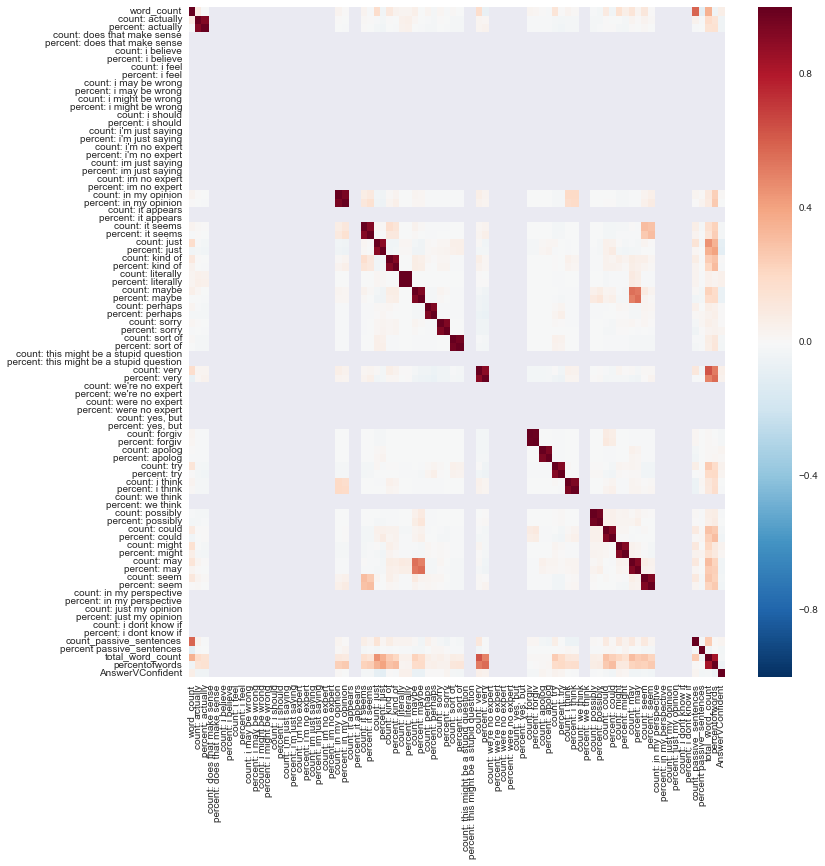

In [335]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(wdfnew.corr())

In [342]:
X = wdfnew.iloc[:, 5:-1]

In [343]:
X.drop('writergender_firstname', axis=1, inplace=True)

In [344]:
Xtotals = X.iloc[:, -4:]

In [345]:
Xtotals.drop('percent passive_sentences', axis=1, inplace=True)

In [348]:
y = wdfnew.iloc[:, -1]

In [ ]:
#evaluate base case (how accurate it would be if you guessed the dominant class every time)

In [358]:
y.value_counts()

0.0    1083
1.0     285
Name: AnswerVConfident, dtype: int64

In [361]:
1083/(1083+283.)

0.7928257686676428

In [350]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

## Now Build That Model

In [351]:
#create a function that evaluates the model once built
def evaluate_model(model):
    #fit model on train
    model.fit(X_train, y_train)
    
    #predict High or Low based on test
    y_pred = model.predict(X_test)
    
    #create accuracy between the actual ratings and the predicted ratings
    a = accuracy_score(y_test, y_pred)
    
    #create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    #create a classification report, which includes f1 score
    cr = classification_report(y_test, y_pred)
    
    #return elements built above
    print cm
    print cr
    
    return a

#create empty dictionary to input scores
all_models = {}

In [353]:
#import
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

#create decision tree model
dt = DecisionTreeClassifier()

#add model to dictionary
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[[289  35]
 [ 63  24]]
             precision    recall  f1-score   support

        0.0       0.82      0.89      0.86       324
        1.0       0.41      0.28      0.33        87

avg / total       0.73      0.76      0.74       411



In [354]:
from sklearn.grid_search import GridSearchCV

/Users/samanthafalk/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [355]:
#create dictionary of possible parmaters for the gridsearch
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}
#perform gridsearch
gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

#call function on best params and best score
all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 5, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
0.791666666667
[[323   1]
 [ 84   3]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       324
        1.0       0.75      0.03      0.07        87

avg / total       0.78      0.79      0.71       411



In [356]:
#import
from sklearn.ensemble import BaggingClassifier

In [357]:
#bagging dictionary to be passed into gridsearch
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}

In [362]:
#run gridsearch on decision tree clasifier
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

#run model function 
all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 10, 'bootstrap_features': True}
0.791666666667
[[324   0]
 [ 87   0]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       324
        1.0       0.00      0.00      0.00        87

avg / total       0.62      0.79      0.70       411



/Users/samanthafalk/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest & Extra Trees w/ gridsearch

In [363]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#call RT class
rf = RandomForestClassifier()

#call function to run model
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}


#call ET class
et = ExtraTreesClassifier()

#call function to run model
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}

[[306  18]
 [ 73  14]]
             precision    recall  f1-score   support

        0.0       0.81      0.94      0.87       324
        1.0       0.44      0.16      0.24        87

avg / total       0.73      0.78      0.74       411

[[300  24]
 [ 70  17]]
             precision    recall  f1-score   support

        0.0       0.81      0.93      0.86       324
        1.0       0.41      0.20      0.27        87

avg / total       0.73      0.77      0.74       411



In [364]:
#define options for gridsearch
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}

#run gridsearch
gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

#call function to run model and find score
all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 10, 'criterion': 'gini', 'max_depth': 5, 'class_weight': None}
0.792397660819
[[322   2]
 [ 87   0]]
             precision    recall  f1-score   support

        0.0       0.79      0.99      0.88       324
        1.0       0.00      0.00      0.00        87

avg / total       0.62      0.78      0.69       411



In [365]:
#run gridsearch on RT
gset = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

#fit best gridsearch model, use X and y instead of training since girdsearch uses kfold
gset.fit(X, y)
print gset.best_params_
print gset.best_score_

#call function to run model and find score
all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 2, 'n_estimators': 5, 'criterion': 'gini', 'max_depth': 5, 'class_weight': None}
0.793128654971
[[324   0]
 [ 86   1]]
             precision    recall  f1-score   support

        0.0       0.79      1.00      0.88       324
        1.0       1.00      0.01      0.02        87

avg / total       0.83      0.79      0.70       411



score
model                
gsdt         0.793187
gset         0.790754
gsbaggingdt  0.788321
gsrf         0.783455
rf           0.778589
et           0.771290
dt           0.761557

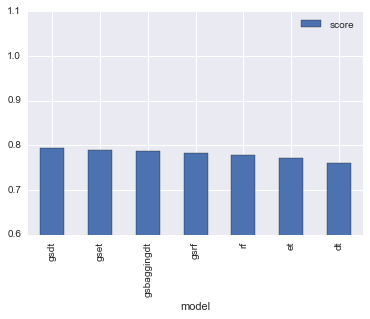

In [366]:
#return compilation of all scores for models run & graoh
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=False)


scores.plot(kind='bar')
plt.ylim(0.6, 1.1)

scores

## Source information that backs up key word and phrase use

In [41]:
for x in Gmailplugin:
    print x['source']
    print

http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/

http://www.taramohr.com/8-ways-women-undermine-themselves-with-their-words/

http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything

http://www.fastcompany.com/3032112/strong-female-lead/sorry-not-sorry-why-women-need-to-stop-apologizing-for-everything

http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails

http://www.fastcompany.com/3049609/the-future-of-work/4-types-of-useless-phrases-you-need-to-eliminate-from-your-emails

http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInTheWorkplace.pdf

https://expresswriters.com/50-weak-words-and-phrases-to-cut-out-of-your-blogging/

http://blog.crew.co/5-weak-words-to-avoid/

http://www.strategicserendipityforlife.com/documents/Articles/Communication_8TipsForFearlessCommunicationInThe